In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['xtick.labelsize']=20
matplotlib.rcParams['ytick.labelsize']=20


# Seattle data
Let's import and investigate the Seattle data and see if we can use any of it and what modifications would be necessary. 

In [2]:
#Import Listings
df_seattle_list = pd.read_csv('input/seattle/listings.csv')
print(df_seattle_list.shape)
df_seattle_list.head(5)

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
#Import calendar.csv
df_seattle_cal = pd.read_csv('input/seattle/calendar.csv', parse_dates=[1])
print(df_seattle_cal.shape)
df_seattle_cal.head(5)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
#import reviews 
df_seattle_rev = pd.read_csv('input/seattle/reviews.csv', parse_dates=[2])
print(df_seattle_rev.shape)
df_seattle_rev.head(5)

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Lets dive into the listings dataframe in more detail to understand what is actually there. It seems the calendar and reviews dataframe are useful as metadata if we want to dig deep into the matter, but we will wait a bit with this now.

## Listings 

First thing we need to understand more of what data are available in the columns in the listings. Some of the data can probably be discarded right away, or kept in the background until we need more nuanced insights, while other columns should be our main pillars of knowledge.

Let's first see if some columns are practically without information

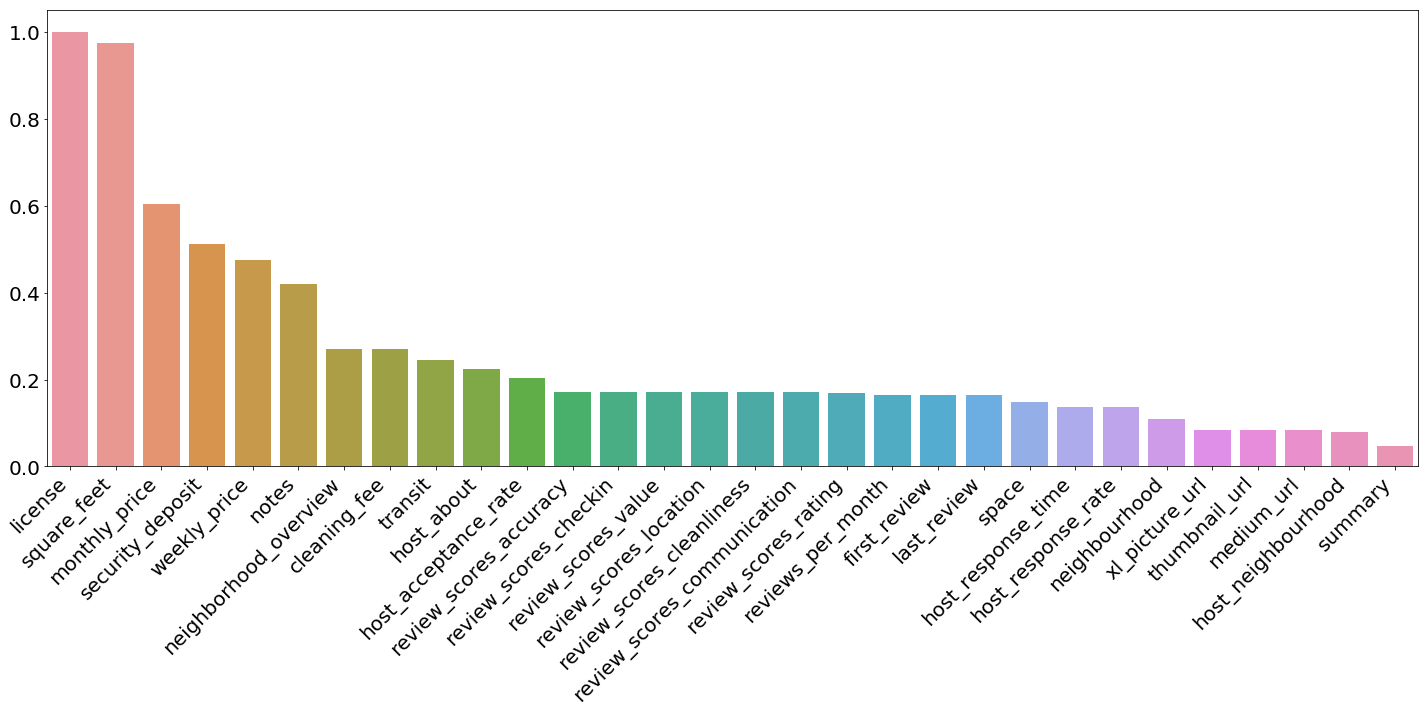

In [5]:
missing_list = (1-df_seattle_list.count()/df_seattle_list.shape[0]).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=missing_list[missing_list>0.01].index, y = missing_list[missing_list>0.01] , ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.tight_layout()
#ax.set_ylabel('Missing values ratio', size=15)

First of all we can see from this that the license are missing for all. When looking closer at the columns, there is a column called "requires_license". This seems to be all false, hence there is little information about the license and we can add both of those to a list of columns to drop for Seattle. However, that does not mean it can be dropped for other cities.

Anyway, any column that have one unique value will not provide any additional information about the host or client or anything else, it is equal for all our datapoints. So we will first find all those columns and see how many and what they are, and ditch them. 

In [6]:
pd.set_option('display.max_rows', 1000)
(df_seattle_list.count()/df_seattle_list.shape[0]).sort_values()

license                             0.000000
square_feet                         0.025406
monthly_price                       0.397328
security_deposit                    0.488738
weekly_price                        0.526192
notes                               0.579361
neighborhood_overview               0.729701
cleaning_fee                        0.730225
transit                             0.755369
host_about                          0.775013
host_acceptance_rate                0.797538
review_scores_checkin               0.827658
review_scores_accuracy              0.827658
review_scores_value                 0.828182
review_scores_location              0.828444
review_scores_cleanliness           0.828968
review_scores_communication         0.829492
review_scores_rating                0.830540
last_review                         0.835778
first_review                        0.835778
reviews_per_month                   0.835778
space                               0.850969
host_respo

Text(0, 0.5, 'Number of unique entries')

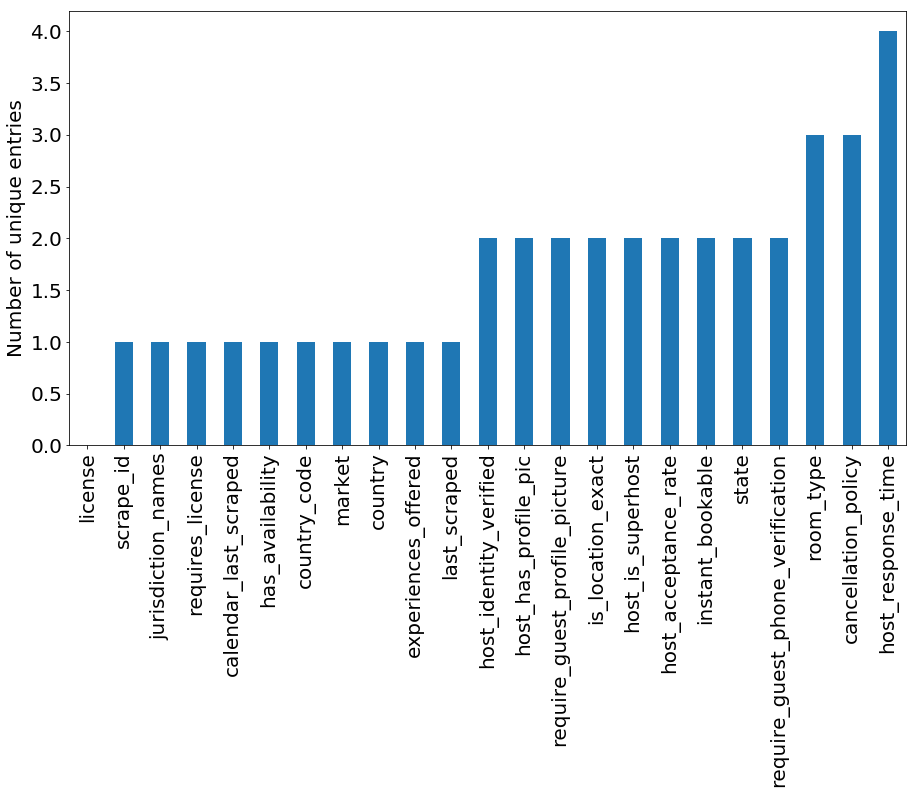

In [7]:
ax = df_seattle_list.nunique()[df_seattle_list.nunique()<5].sort_values().plot(kind='bar', figsize=(15,8))
ax.set_ylabel('Number of unique entries', fontsize=20)

Lets remove the uninformative columns right away

In [8]:
df_seattle_list_reduced = df_seattle_list.drop(labels=df_seattle_list.nunique()[df_seattle_list.nunique()<2].index, axis=1)
df_seattle_list_reduced.shape

(3818, 81)

Lets also look at the other end of the scale, the columns that has basically all unique values. No overlapping ones. 

Text(0, 0.5, 'Unique ratio')

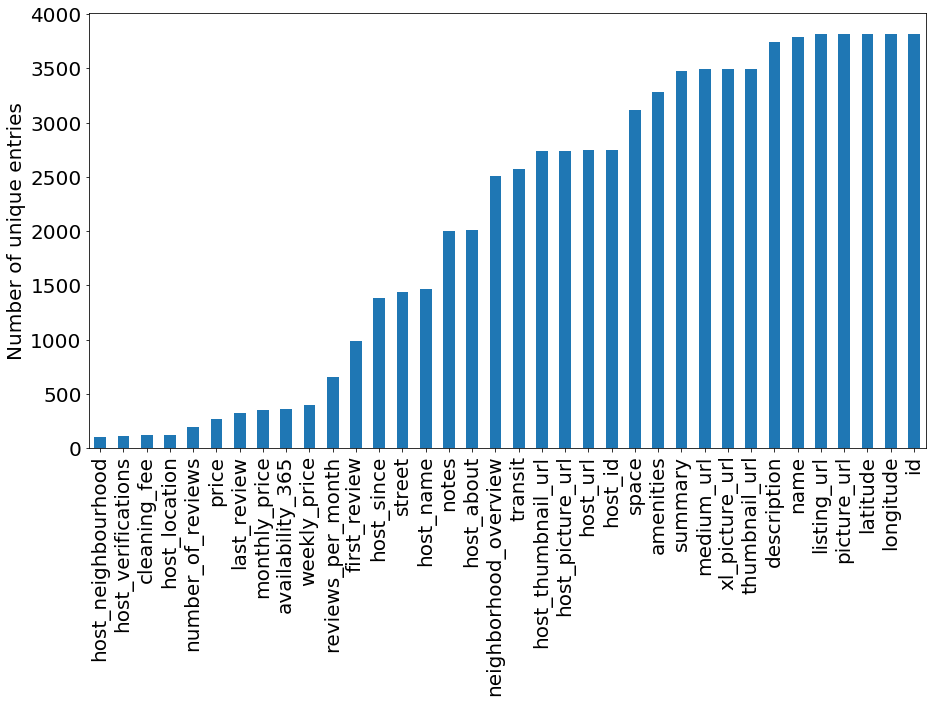

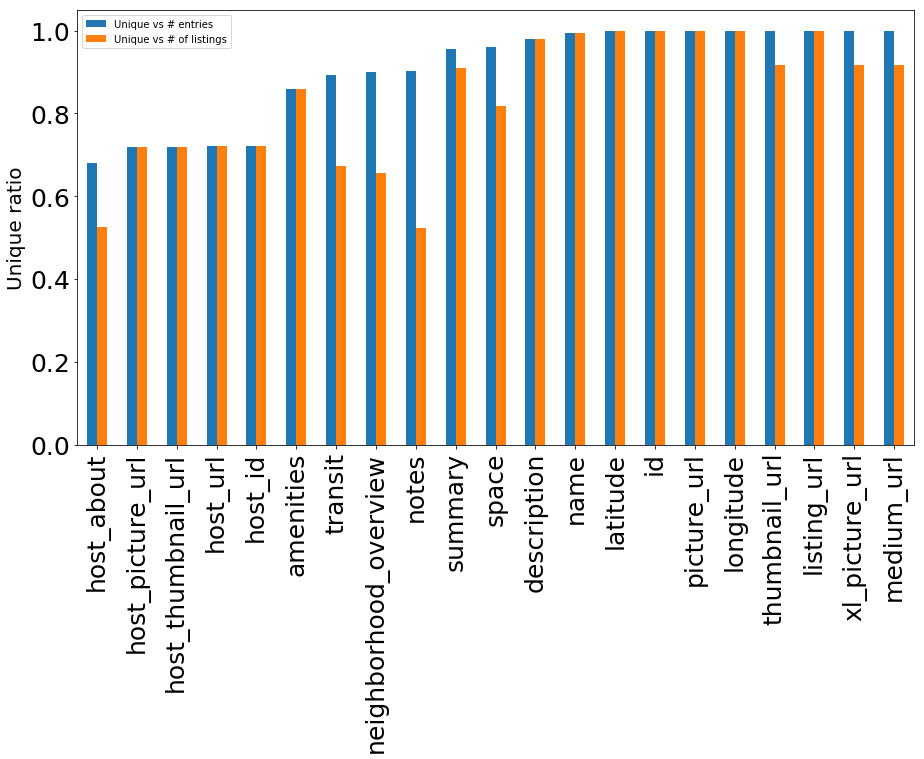

In [9]:
ax = (df_seattle_list.nunique())[df_seattle_list.nunique()>100].sort_values().plot(kind='bar', figsize=(15,8))
#(df_seattle_list.nunique()/df_seattle_list.shape[0])[df_seattle_list.nunique()>100].sort_values().plot(kind='bar', figsize=(15,8), ax=ax)
ax.set_ylabel('Number of unique entries', fontsize=20)
df_unique_ratios = pd.DataFrame({'Unique vs # entries': df_seattle_list.nunique()/df_seattle_list.count(), 'Unique vs # of listings': df_seattle_list.nunique()/df_seattle_list.shape[0]})
ax2 = df_unique_ratios[df_unique_ratios['Unique vs # entries']>0.5].sort_values('Unique vs # entries').plot(kind='bar', figsize=(15,8), fontsize=25)
ax2.set_ylabel('Unique ratio', fontsize=20)

We can see that the ratio of unique values change slightly if we related it to actual number of entries. 

We can see that there are quite some columns that would not give any useful information as they are all different.

Latitude and Longitude are also among the columns with all unique values. These are expected to be unique and still give insight, thus these cannot be removed. However, it will not matter much what url people use for their pics, unless, maybe, there is a difference if they have pictures or not... Again, we can see that all has a picture url (further up), and all is unique, so not much to gain from this. 

We can also see that less than 80% of number of listings with a host (probably every listing) have a unique host. The rest of the listings are then hosted by the same person having more than one listing. 



To ease our pain, we will remove the columns with all unique values (except for latitude and longitude, also id can be useful if we want to use the calendar and review data).

In [10]:
all_unique_cols = df_unique_ratios[df_unique_ratios['Unique vs # entries']==1]
all_unique_cols = all_unique_cols.drop(labels=['latitude', 'longitude', 'id'], axis=0).index
all_unique_cols
df_seattle_list_reduced = df_seattle_list_reduced.drop(labels=all_unique_cols, axis=1)
df_seattle_list_reduced.shape

(3818, 76)

As seen above, there are still 75 columns after removing columns without information and we need to go deeper into some of them to see what they are. Lets first check quickly what the different columns type is. 

In [11]:
df_seattle_list_reduced.get_dtype_counts()

int64      12
object     48
float64    16
dtype: int64

We can see that 16 of them are floats, while 12 is integers. Floats are usually numerical continous values, but could also be ordinal or categorical if not formatted properly. Integers are probably both categorical and ordinal values, but we will look further into the different ones. The object group is here a mix of text boxes and categorical values. As we saw from the number of unique entries above, there are several columns that has a limited number of entries, and thus is a categorical or ordinal value and not free text, or free numbers. 

First, a look at the floats

In [12]:
df_list_float = df_seattle_list_reduced.select_dtypes(include='float')
df_list_float.head(5)

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89


In [16]:
print(df_list_float.shape)
df_list_float.describe()

(3818, 16)


,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,7.157757,7.157757,47.628961,-122.333103,1.259469,1.307712,1.735394,854.618557,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,28.628149,28.628149,0.043052,0.031745,0.590369,0.883395,1.139480,671.404893,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,1.000000,1.000000,47.505088,-122.417219,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,1.000000,1.000000,47.609418,-122.354320,1.000000,1.000000,1.000000,420.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,1.000000,1.000000,47.623601,-122.328874,1.000000,1.000000,1.000000,750.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,3.000000,3.000000,47.662694,-122.310800,1.000000,2.000000,2.000000,1200.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,502.000000,502.000000,47.733358,-122.240607,8.000000,7.000000,15.000000,3000.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


The latitude and longitude is probably not that interesting given that we have the neighborhood. However, we saw above that quite some listings lacked the neighborhood and thus it could be interesting to use the position to estimate location. 

Also, the square feet, which could be interesting in general, seem to not be very easy to impute as most listings lack the data for it. 

Otherwise, we will keep the rest of the columns for now. 

Let's have a look at the integer columns

In [13]:
df_list_int = df_seattle_list_reduced.select_dtypes(include='integer')
df_list_int.head(5)

,id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,956883,4,2,1,365,14,41,71,346,207,2
1,953595,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,1452570,6,6,1,1125,30,60,90,365,38,1


In [15]:
print(df_list_int.shape)
df_list_int.describe()

(3818, 12)


,id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
count,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,1.578556e+07,3.349398,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,2.946307
std,2.962660e+06,1.458382e+07,1.977599,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,5.893029
min,3.335000e+03,4.193000e+03,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.258256e+06,3.275204e+06,2.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,1.000000
50%,6.118244e+06,1.055814e+07,3.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,1.000000
75%,8.035127e+06,2.590309e+07,4.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,2.000000
max,1.034016e+07,5.320861e+07,16.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,37.000000
